<a href="https://colab.research.google.com/github/ChandanSSS/final-project-cnn/blob/main/HUNTER_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age    

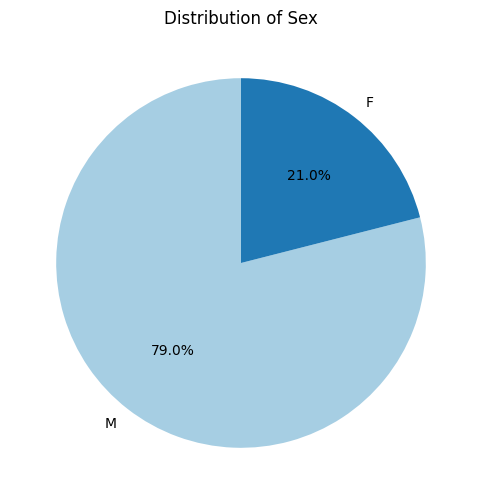

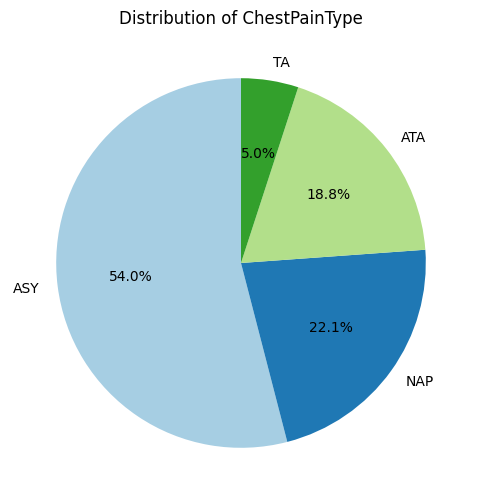

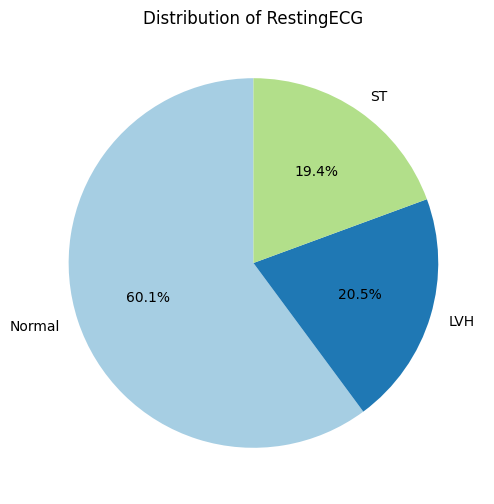

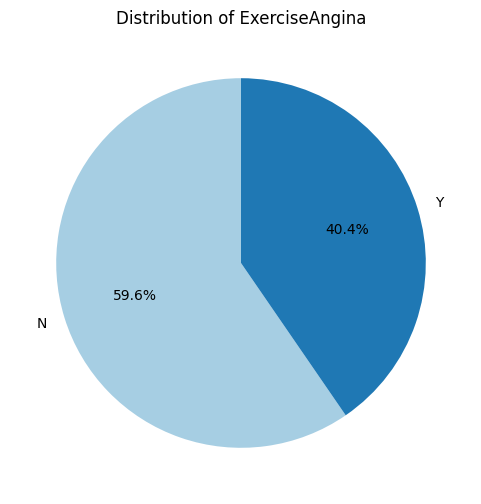

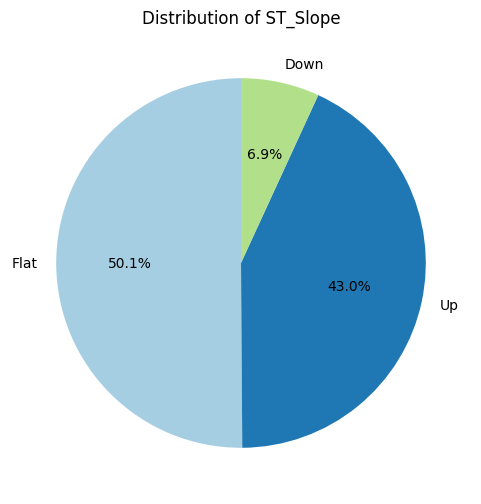

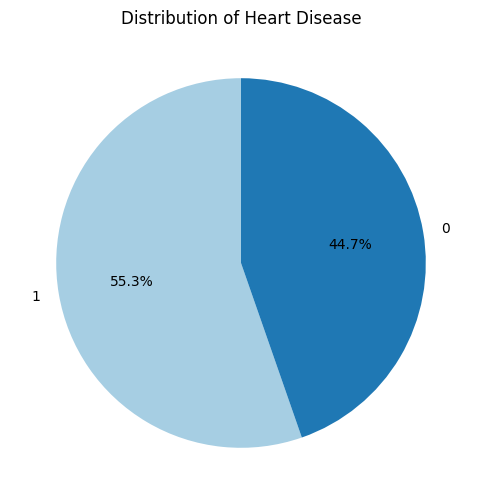

Training data shape: (642, 11, 1)
Test data shape: (276, 11, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.6055 - loss: 0.6702 - val_accuracy: 0.7132 - val_loss: 0.6289
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7182 - loss: 0.6109 - val_accuracy: 0.7287 - val_loss: 0.5929
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6813 - loss: 0.5748 - val_accuracy: 0.7209 - val_loss: 0.5600
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7636 - loss: 0.5010 - val_accuracy: 0.6744 - val_loss: 0.6172
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7502 - loss: 0.5227 - val_accuracy: 0.7442 - val_loss: 0.5436
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7559 - loss: 0.5183 - val_accuracy: 0.7752 - val_loss: 0.5249
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7324 - loss: 0.4964 - val_accuracy: 0.7597 - val_loss: 0.5189
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7790 - loss: 0.4707 - val_accuracy: 0.7674 - val_loss

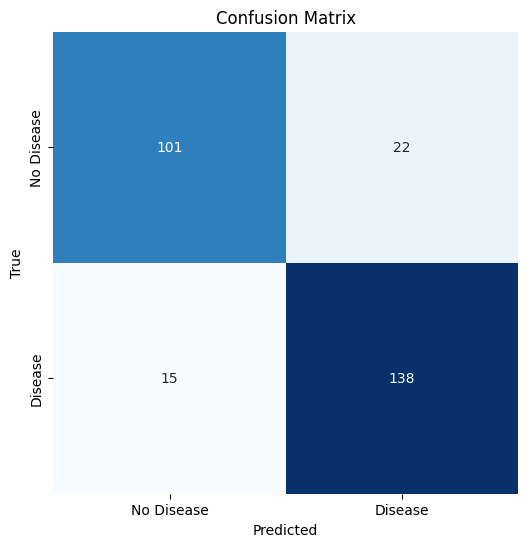

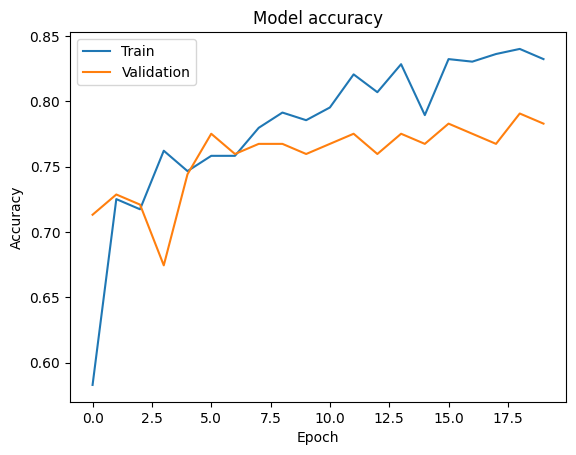

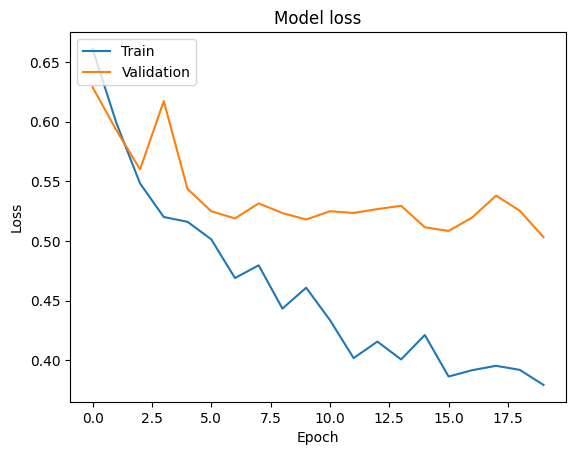

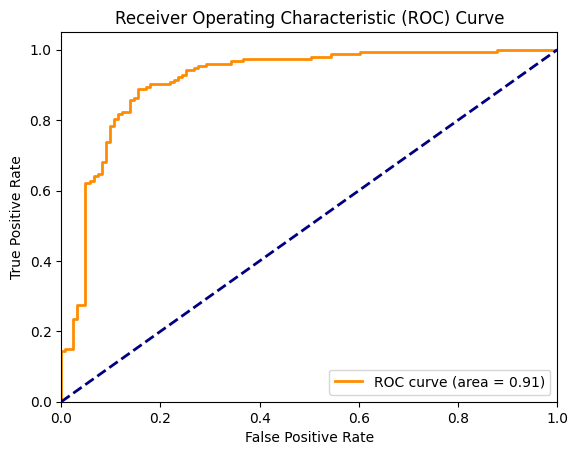

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


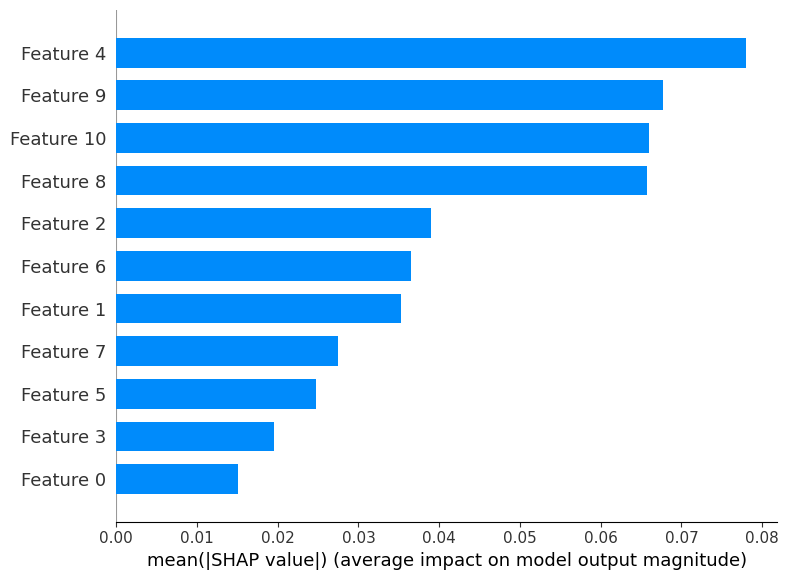

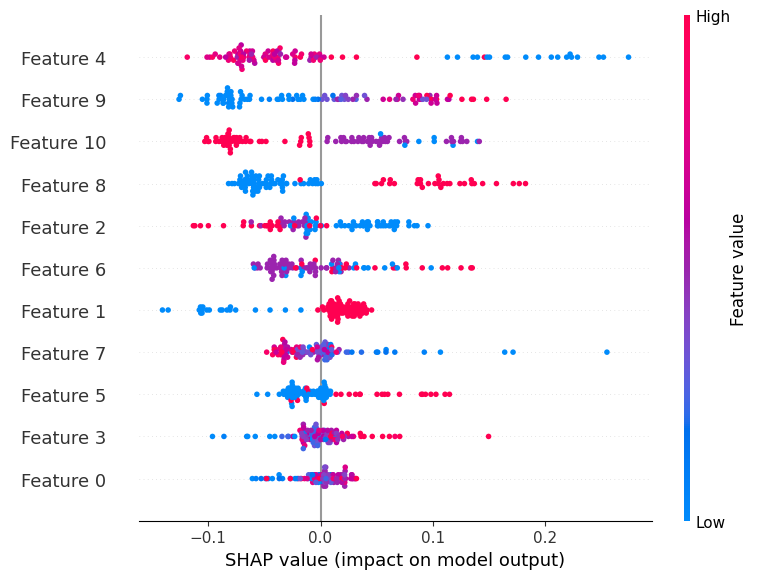

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D
import plotly.express as px
import shap

# Load your heart disease dataset
data = pd.read_csv('/content/heart.csv')

# Inspect the first few rows of the dataset
print(data.head())

# Check the data types and see if there are any missing values
print(data.info())

# Create pie charts for categorical feature distributions
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

for col in categorical_cols:
    plt.figure(figsize=(6, 6))
    data[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title(f'Distribution of {col}')
    plt.ylabel('')
    plt.show()

# Create a pie chart for the target variable
plt.figure(figsize=(6, 6))
data['HeartDisease'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Heart Disease')
plt.ylabel('')
plt.show()

# Preprocess the data: Convert categorical variables into numerical values
label_encoders = {}

# Encode each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Separate the features (X) and the target variable (y)
X = data.drop(columns=['HeartDisease'])  # 'HeartDisease' is the target
y = data['HeartDisease']

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape the features for CNN (add a channel dimension)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)

# Build a CNN model
model = Sequential()

# Add a 1D convolutional layer
model.add(Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Add a second convolutional layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))

# Flatten the output from convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))

# Add the output layer (sigmoid for binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

# Make predictions on the test set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluate the model with accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# SHAP Model Explainability
def explain_model(model, X_test):
    # Select a smaller subset of test data for explanation
    subset_size = 100
    X_test_subset = X_test[:subset_size]

    # Ensure the SHAP explainer matches the input shape of the model
    explainer = shap.DeepExplainer(model, X_test_subset)
    shap_values = explainer.shap_values(X_test_subset)

    # Handle the case where shap_values is a list (for multi-output models)
    if isinstance(shap_values, list):
        shap_values = shap_values[0]  # Select the first output's SHAP values

    # Reshape SHAP values to match the original input shape
    shap_values_reshaped = shap_values.reshape(shap_values.shape[0], -1)

    # Reshape X_test_subset for compatibility with summary_plot
    X_test_subset_reshaped = X_test_subset.reshape(X_test_subset.shape[0], -1)

    # Plot summary using SHAP mean absolute values
    shap.summary_plot(shap_values_reshaped, X_test_subset_reshaped, plot_type="bar")
    shap.summary_plot(shap_values_reshaped, X_test_subset_reshaped)

# Call the explain_model function to generate SHAP plots
explain_model(model, X_test)
